In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded= files.upload() #untuk mengupload file dataset agar tetap kompatibel dengan data

Saving used_cars.csv to used_cars (5).csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn]))) #untuk mengetahui nama dataset dan panjang datanya

User uploaded file "used_cars.csv" with length 60741121 bytes


In [ ]:
uploaded

In [ ]:
import io

In [ ]:
usedcars_df = pd.read_csv(io.StringIO(uploaded['used_cars.csv'].decode('utf-8'))) #memasukkan dataset kedalam variabel

In [ ]:

usedcars_df = usedcars_df[['price' , 'year' , 'condition']] #karena banyaknya data, maka saya akan memilih 3 feature saja agar lebih memudahkan

In [ ]:

usedcars_df.head() #menampilkan dataset yang telah dipilih

,price,year,condition
0,17899,2012.0,excellent
1,0,2016.0,excellent
2,46463,2015.0,excellent
3,0,2016.0,excellent
4,49999,2018.0,NaN


In [ ]:
usedcars_df['year'].describe()
usedcars_df.isna().sum()

 #untuk mendeskripsikan nilai nilai yang terdapat pada feature year

price           0
year           12
condition    9152
dtype: int64

In [ ]:
usedcars_df2 = usedcars_df[usedcars_df['year'] > 1.5] #mengurangi data dimana year diatas 1.5 tahun yang akan diambil
usedcars_df0 = usedcars_df2[usedcars_df2['price'] < 50000] #mengurangi data dimana price yang dibawah 50000 akan diambil 

In [ ]:
len(usedcars_df), len(usedcars_df2) #menampilkan total data sebelum dan sesudah diseleksi

(20001, 19989)

In [ ]:
usedcars_df2.head() #menampilkan dataset dari yang telah diseleksi

,price,year,condition
0,17899,2012.0,excellent
1,0,2016.0,excellent
2,46463,2015.0,excellent
3,0,2016.0,excellent
4,49999,2018.0,NaN


In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans #memanggil library
import matplotlib.pyplot as plt

In [ ]:
minmax = preprocessing.MinMaxScaler().fit_transform(usedcars_df0.drop('condition', axis=1)) #untuk memudahkan clustering, maka feature 'condition' akan dihilangkan agar data dapat di minmax

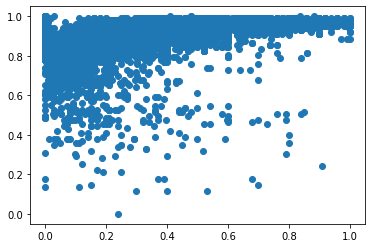

In [ ]:
usedcars_df3 = pd.DataFrame(minmax, index=usedcars_df0.index, columns=usedcars_df0.columns[:-1]) #mengubah data menjadi dibawah -1 untuk memudahkan perhitungan
plt.scatter(usedcars_df3['price'], usedcars_df3['year'])



In [ ]:
usedcars_df3 #memudahkan perhitungan clustering dan biar lebih cepat

,price,year
0,0.357987,0.922330
1,0.000000,0.961165
2,0.929279,0.951456
3,0.000000,0.961165
4,1.000000,0.980583
...,...,...
19996,1.000000,0.961165
19997,0.242545,0.980583
19998,0.000000,0.990291
19999,0.293226,0.970874


In [ ]:
!pip install yellowbrick 

In [ ]:
scr = []
for i in range (1,10):
  score = KMeans (n_clusters=i).fit(usedcars_df3).score(usedcars_df3)
  scr.append(score)

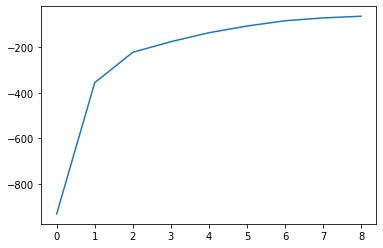

In [ ]:
plt.plot(scr)

In [ ]:
import random

In [ ]:
centeroid = []
x = []
y = []
lists = usedcars_df3.values.tolist()
for j in range(3):
    c = random.randint(0,len(lists))
    centeroid.append(lists[c])

centeroids = np.array(centeroid)


for i in range(len(lists)):
    x.append(lists[i][0])
    y.append(lists[i][1])
    

In [ ]:
c1 = []
c2 = []
c3 = []

C1x = []
C2x = []
C3x = []

C1y = []
C2y = []
C3y = []

changing = True


In [ ]:
def draw():
    from pylab import rcParams
    rcParams['figure.figsize'] = 20, 20
    plt.scatter(C1x, C1y, c="maroon")
    plt.scatter(C2x, C2y, c="cyan")
    plt.scatter(C3x, C3y, c="black")

    plt.grid()
    for i in centeroids:
        plt.scatter(i[0], i[1], 140, marker="*", c="gold")
    plt.show()


In [ ]:
def assign_Point():
    c1.clear();c2.clear();c3.clear();
    for pnt in range(len(lists)):#for each point in the grid
        distances = []
        for i in centeroids:
            #find distance to point using equation (2.1)
            distances.append(((i[0] - x[pnt]) ** 2 + (i[1] - y[pnt]) ** 2) ** 0.5)

        #what is the nearest distance
        nearest = distances.index(min(distances))
#         print(nearest)
        #assign the point to its closest centroid
        if nearest == 0:
            c1.append(pnt)
        elif nearest == 1:
            c2.append(pnt)
        else:
            c3.append(pnt)
    mod() #run function to create arrays with (x,y) coordenates for each centroid
    #arrays called C1x, C1y, C2x, C2y, C3x, C3y    

In [ ]:
def mod():
    C1x.clear();C1y.clear();C2x.clear();C2y.clear();C3x.clear();C3y.clear();
    for i in c1:
        C1x.append(x[i])
        C1y.append(y[i])
    for i in c2:
        C2x.append(x[i])
        C2y.append(y[i])
    for i in c3:
        C3x.append(x[i])
        C3y.append(y[i])

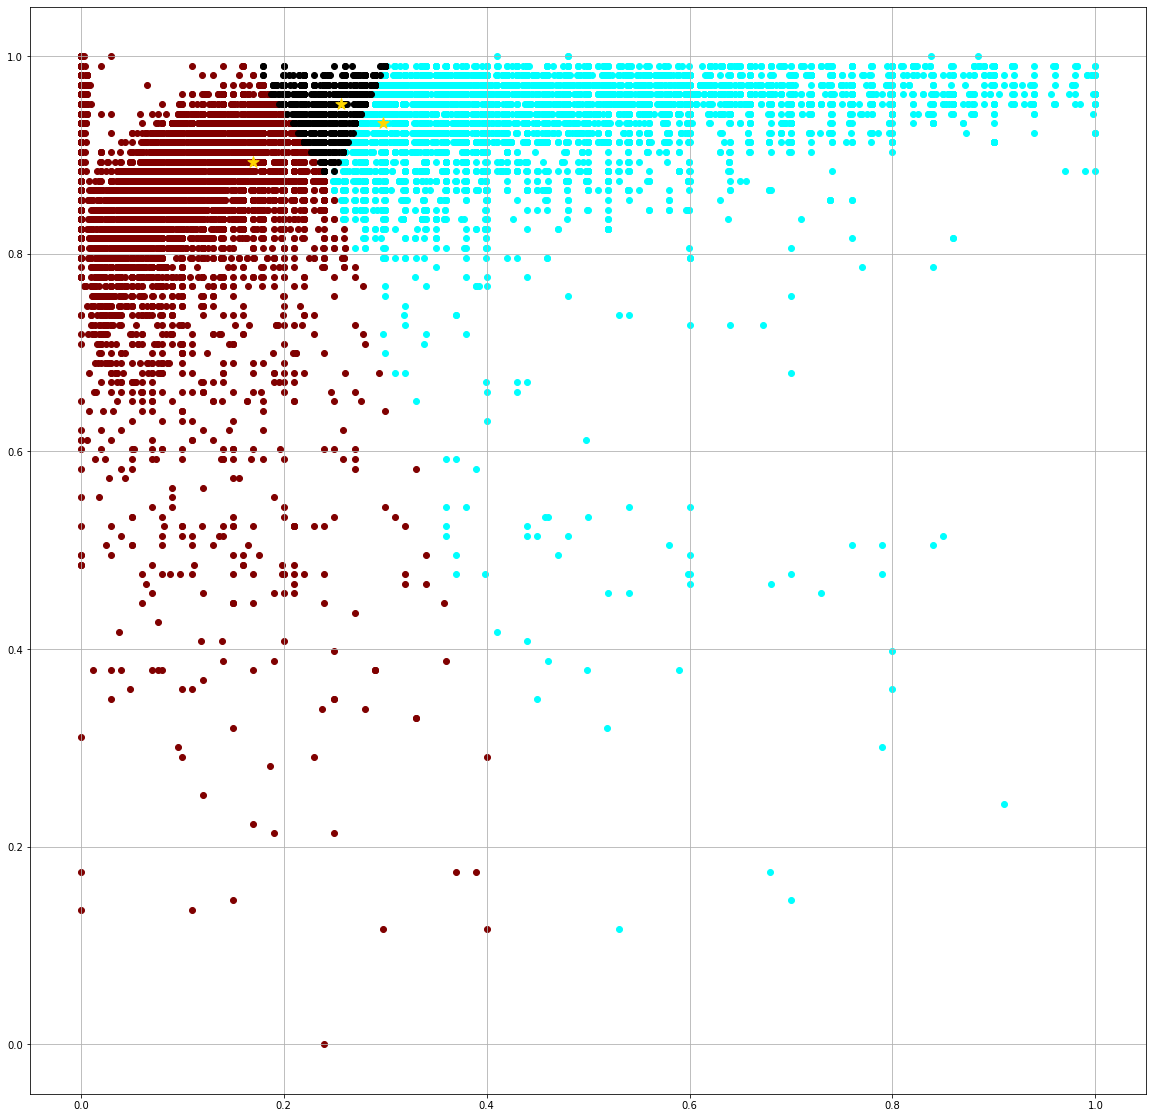

Final Count: 15


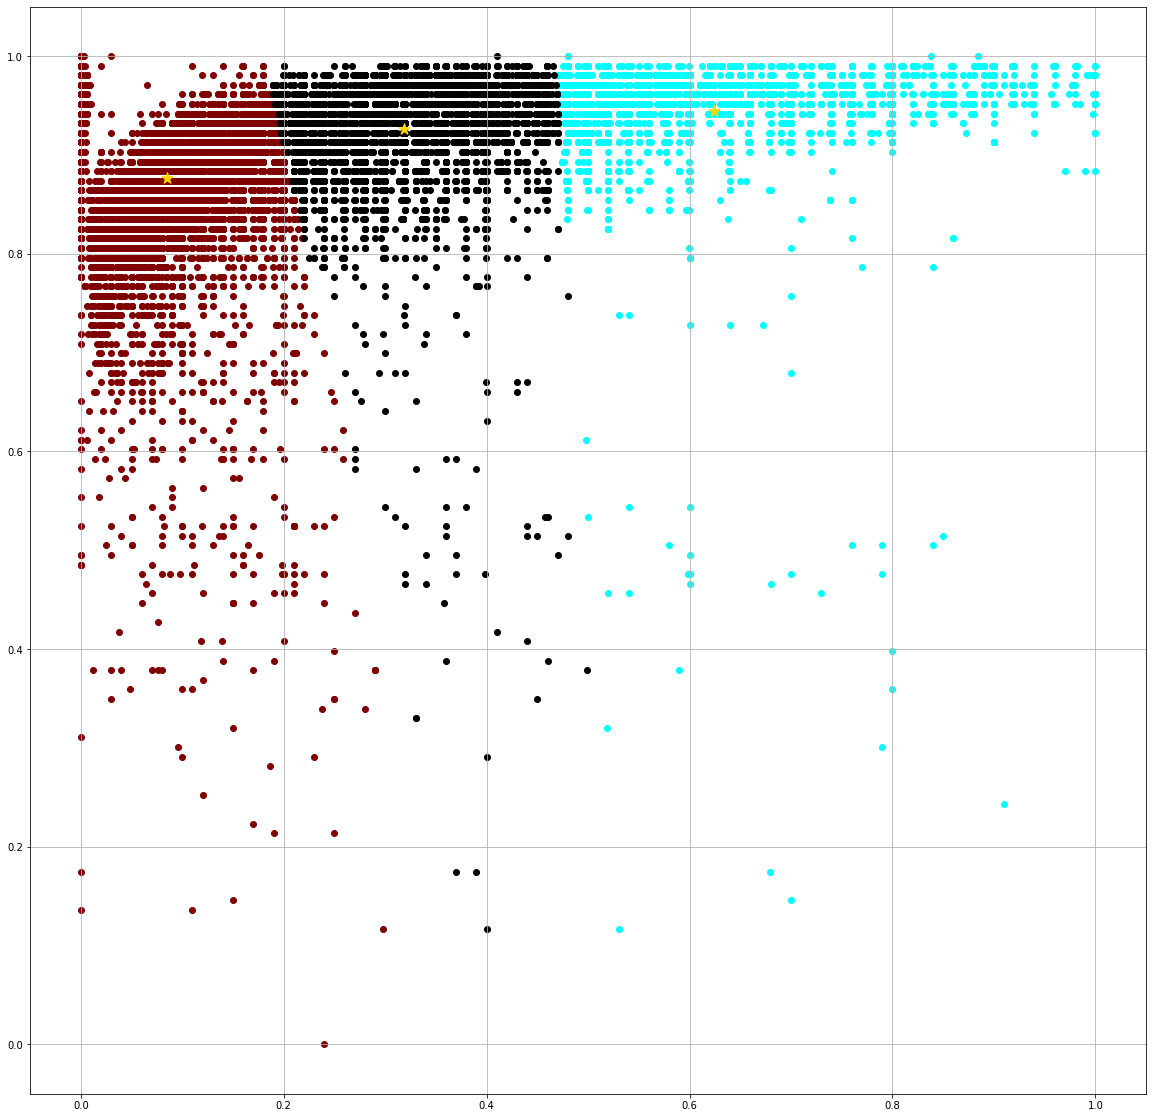

In [ ]:
def move_centroid():
    old_centeroids = centeroids.copy()
    #recenter the centroid at mean of dimention
    #effective use of equation (3.1)
    if len(c1) != 0:
        (centeroids[0])[0] = np.mean(C1x)
        (centeroids[0])[1] = np.mean(C1y)
    if len(c2) != 0:
        (centeroids[1])[0] = np.mean(C2x)
        (centeroids[1])[1] = np.mean(C2y)
    if len(c3) != 0:
        (centeroids[2])[0] = np.mean(C3x)
        (centeroids[2])[1] = np.mean(C3y)

    comparison = old_centeroids - centeroids

    if comparison.all() < 0.001:
        #if they didnt move return false to end program
        return False
    else:
        return True
        #if they did move return true to keep going

assign_Point()

# print(c1)
# print(c2)
# print(c3)
# print(c4)
# print(c5)
draw()
count = 0
while changing: #continue running while changing variable is true
    count = count + 1 #add count to measure # of itterations
    assign_Point() #assign the points to closest centroids
    changing = move_centroid()#update centroid location
    #if the centroids didnt move and function returned False end program
    #if count % 5 == 0:
#     print(count)
#     draw() #display updated graph on screen

print("Final Count: " + str(count))
draw()